In [12]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
import scipy.ndimage as img
from PIL import Image, ImageDraw, ImageFont
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"

In [177]:
class ImgModel:
    
    def generate_aperture(rad=0.5, res=500):
        t = np.linspace(-1, 1, res)
        X, Y = np.meshgrid(t,t)
        R = np.hypot(X, Y)
        Z = np.zeros((res, res))
        Z[R <= rad] = 1
        Z = np.round(Z/Z.max() * 255).astype("uint8")
        return Z
        
    def generate_txtImage(x, y, dims=512, text=None, fontsize=256, fontcolor="white", bgcolor="black", supersample=True, superes=128):
        a = Image.new("L", (dims, dims), color=bgcolor)
        fnt = ImageFont.truetype("C:/Windows/Fonts/Arial.ttf", fontsize)
        d = ImageDraw.Draw(a)
        d.text((x, y), text, font=fnt, fill=fontcolor)
        if supersample:
            a = a.resize((superes, superes), Image.ANTIALIAS)
        a = np.array(a, "uint8")
        return a
    
    def image_aperture(obj, aper):
        Faper = fft.fftshift(aper)
        Fobj = fft.fft2(obj)
        FRA = Faper*Fobj
        IRA = abs(fft.fft2(FRA))
        FImage = np.round(IRA/IRA.max() * 255).astype("uint8")
        return FImage
    
def uint8(X):
    return np.round(abs(X)/abs(X).max() * 255).astype("uint8")

## Activity 1. Familiarization with discrete FFT

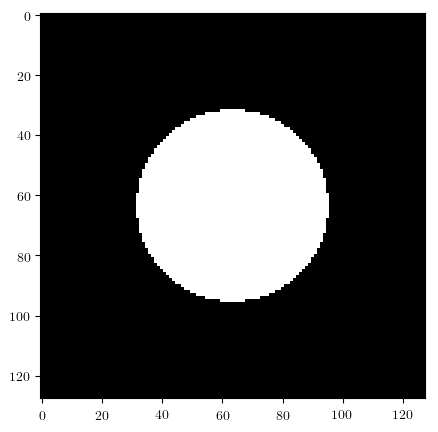

In [178]:
Z = ImgModel.generate_aperture(0.5, 128)
mp.imshow(Z, "gray")
mp.show()

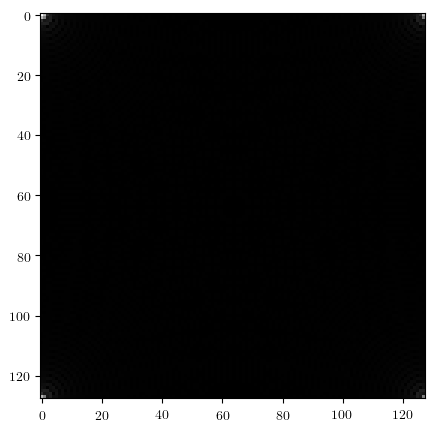

In [179]:
FZ = fft.fft2(Z)
mp.imshow(uint8(FZ), "gray")
mp.show()

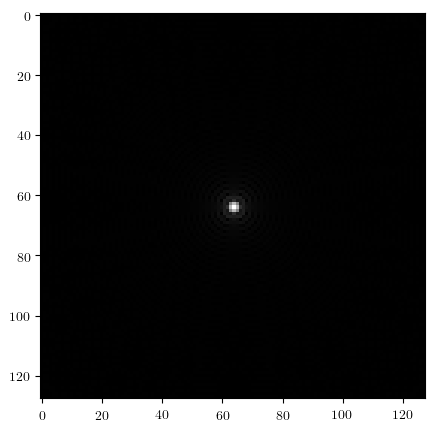

In [181]:
mp.imshow(uint8(fft.fftshift(FZ)), "gray")
mp.show()

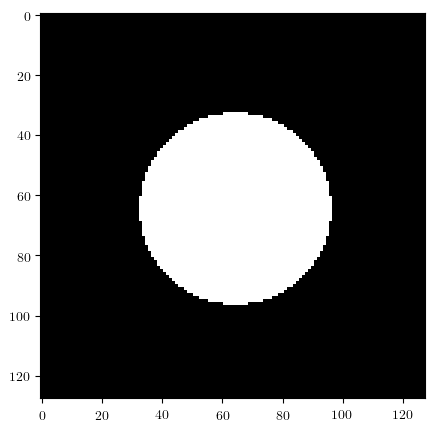

In [183]:
mp.imshow(uint8(fft.fft2(FZ)), "gray")
mp.show()

## Activity 2. Simulation of an imaging device

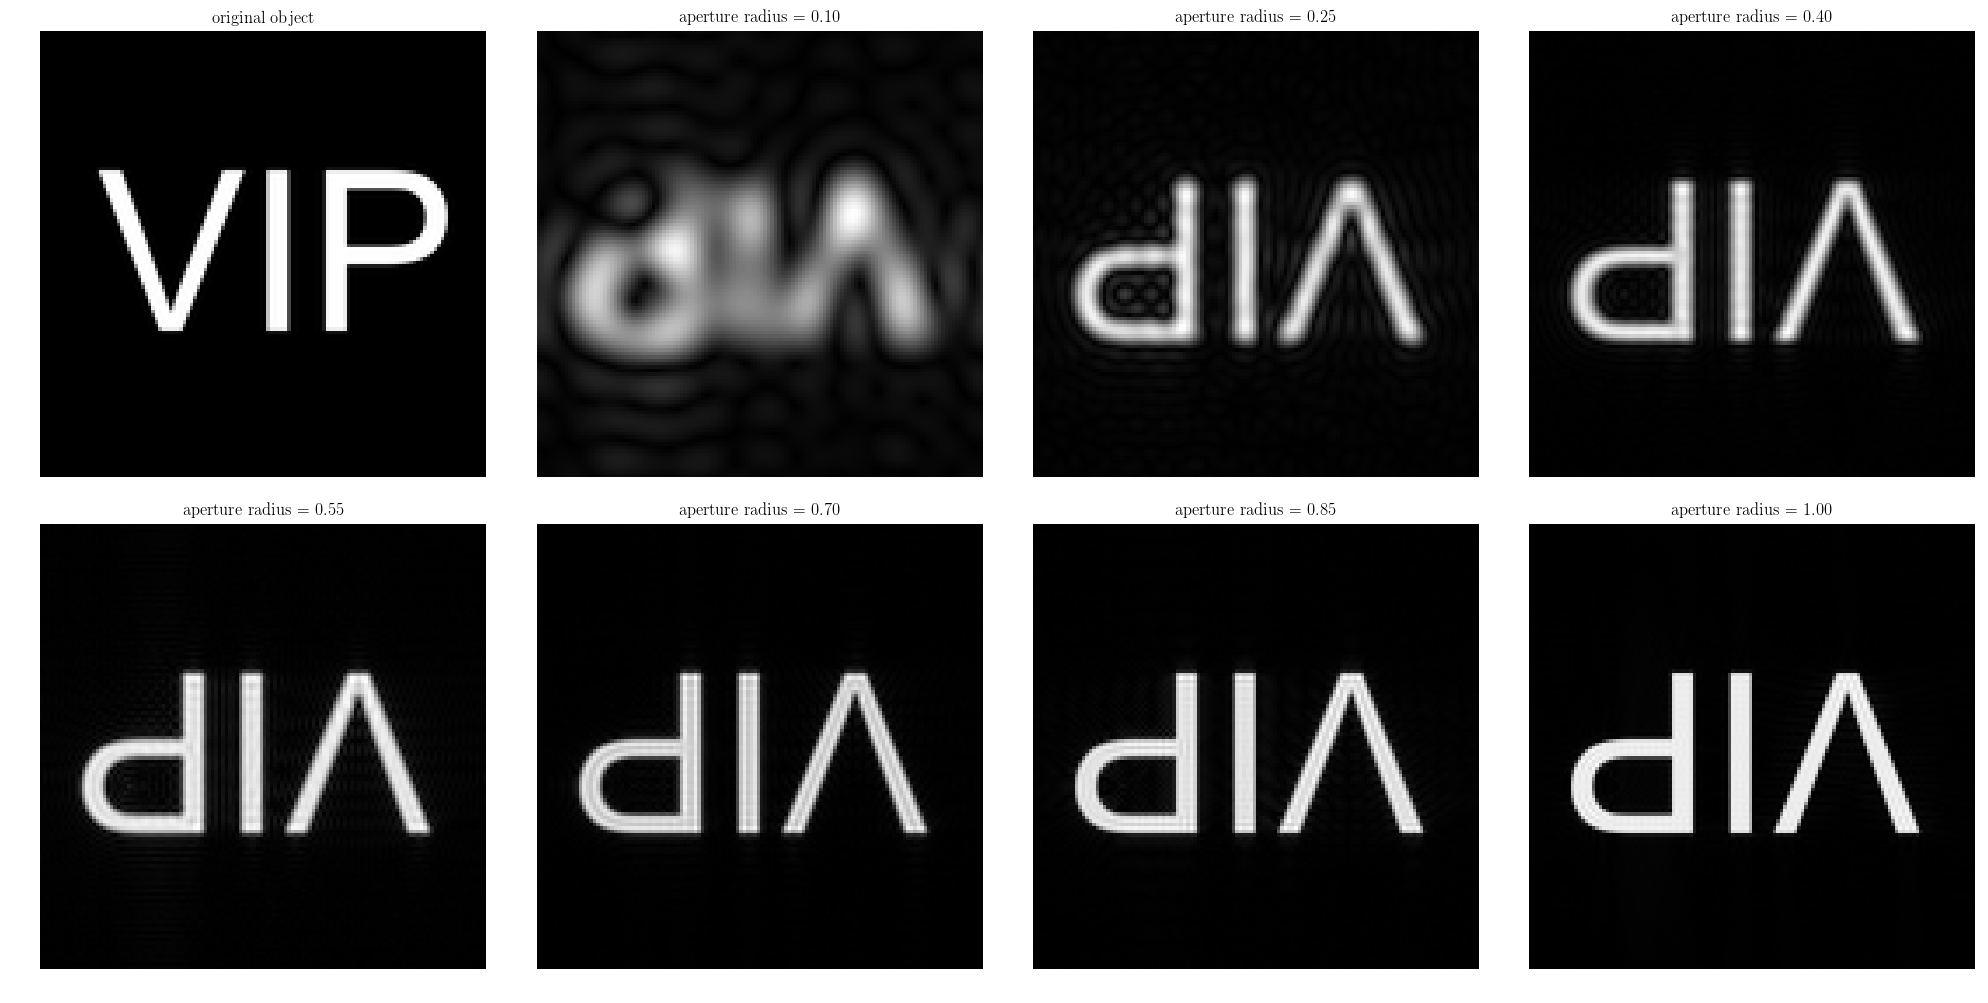

In [184]:
obj = ImgModel.generate_txtImage(66, 112, 512, "VIP", 256, "white", "black", True, 128)
aper_arr = np.linspace(0.1, 1, 7)

fig = mp.figure(figsize=(5*4, 5*2))

ax = fig.add_subplot(241)
ax.imshow(obj, "gray")
ax.axis("off")
ax.set_title("original object")

for i in range(7):
    aper = ImgModel.generate_aperture(rad=aper_arr[i], res=128)
    img = ImgModel.image_aperture(obj, aper)
    ax = fig.add_subplot(2, 4, i+2)
    ax.imshow(img, "gray")
    ax.set_title("aperture radius = %.2f"%(aper_arr[i]))
    ax.axis("off")

mp.tight_layout()
mp.show()

## Activity 3. Template matching using correlation

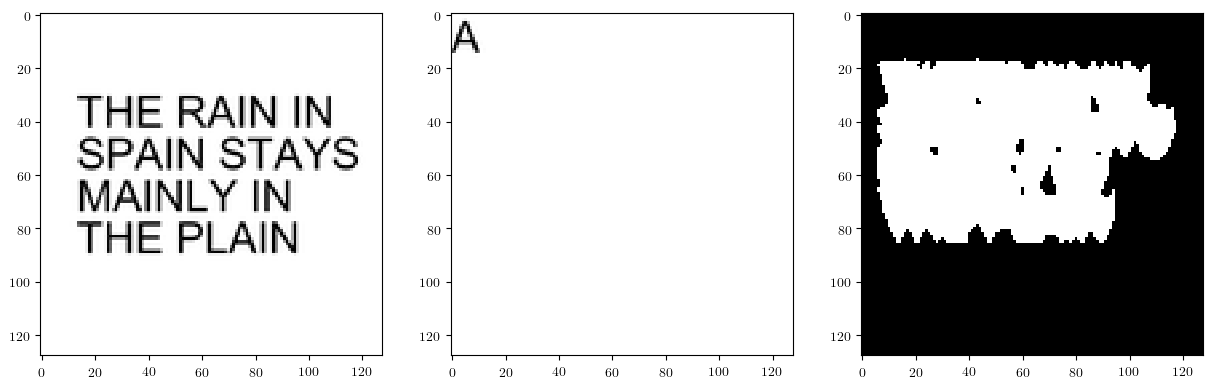

In [185]:
obj = ImgModel.generate_txtImage(55, 112, 512, "THE RAIN IN\nSPAIN STAYS\nMAINLY IN\nTHE PLAIN", 65, "black", "white", True, 128)
temp = ImgModel.generate_txtImage(0, 0, 512, "A", 65, "black", "white", True, 128)

fig = mp.figure(figsize=(5*3, 5))

ax = fig.add_subplot(131)
ax.imshow(obj, "gray")

ax = fig.add_subplot(132)
ax.imshow(temp, "gray")

Fobj = fft.fft2(obj)
Ftemp = fft.fft2(temp)
Fmatch = Ftemp*Fobj.conj()
Fimg = fft.fft2(Fmatch)
ax = fig.add_subplot(133)
ax.imshow(uint8(Fimg), "gray")

mp.show()

## Activity 4. Edge detection using convolution integral

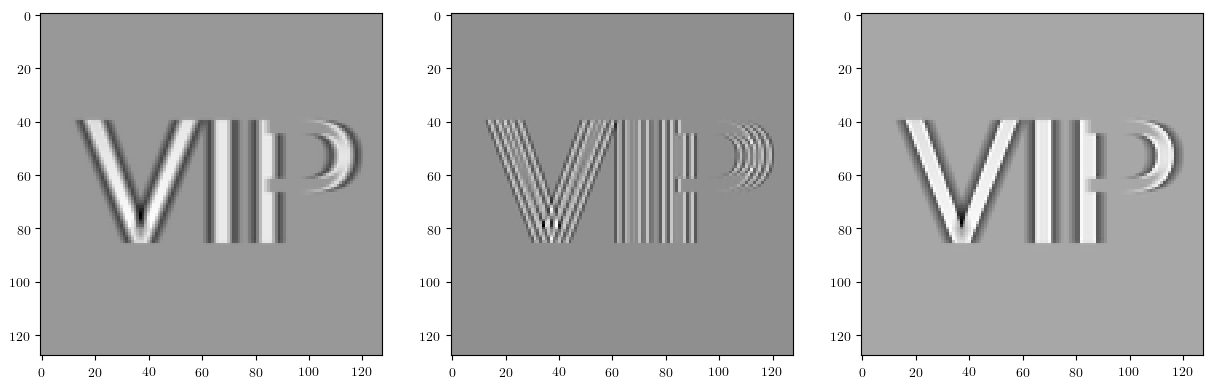

In [186]:
pat1 = np.array([[-1, -1, -1],
               [2, 2, 2],
               [-1, -1, -1]])
pat2 = pat1.T
pat3 = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

obj = ImgModel.generate_txtImage(66, 112, 512, "VIP", 256, "white", "black", True, 128)

fig = mp.figure(figsize=(5*3, 5))

img = np.convolve(pat1.ravel(), obj.ravel(), "same").reshape(obj.shape)
ax = fig.add_subplot(131)
ax.imshow(img, "gray")

img = np.convolve(pat2.ravel(), obj.ravel(), "same").reshape(obj.shape)
ax = fig.add_subplot(132)
ax.imshow(img, "gray")

img = np.convolve(pat3.ravel(), obj.ravel(), "same").reshape(obj.shape)
ax = fig.add_subplot(133)
ax.imshow(img, "gray")

mp.show()